### Configuration

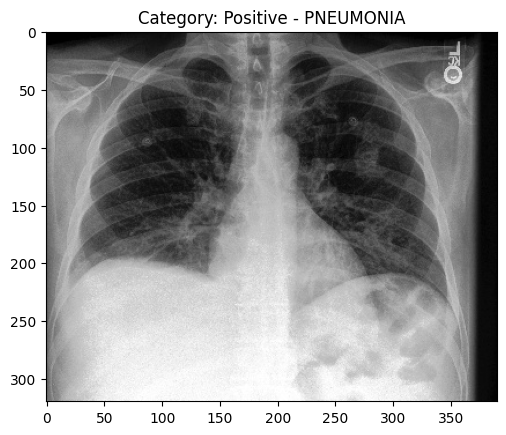

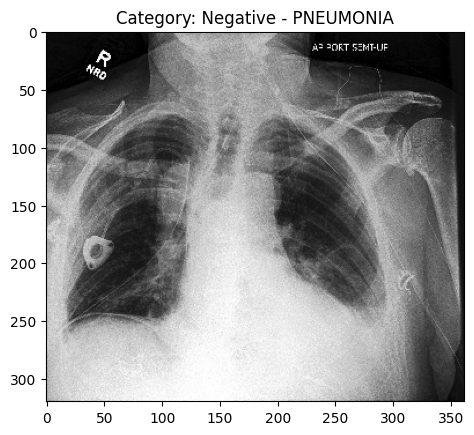

In [41]:
import os
import matplotlib.pyplot as plt
import cv2

# 데이터 경로 설정
data_dir = './02 Data Preprocessing/datas/Pnuemonia/'
categories = ['Positive', 'Negative']

# 샘플 이미지 시각화
for category in categories:
    folder_path = os.path.join(data_dir, category)
    img_name = os.listdir(folder_path)[0]
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title(f'Category: {category} - PNEUMONIA')
    plt.show()

### Image Resize

In [ ]:
def resize_image(image, size=(128, 128)):
    return cv2.resize(image, size)

# 샘플 이미지 크기 조정
resized_img = resize_image(img)
plt.imshow(resized_img, cmap='gray')
plt.title('Resized Image')
plt.show()


### Histogram Equalization

In [ ]:
def equalize_histogram(image):
    return cv2.equalizeHist(image)

# 샘플 이미지 히스토그램 평활화
equalized_img = equalize_histogram(img)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Equalized Image')
plt.show()


### Data Augmentation

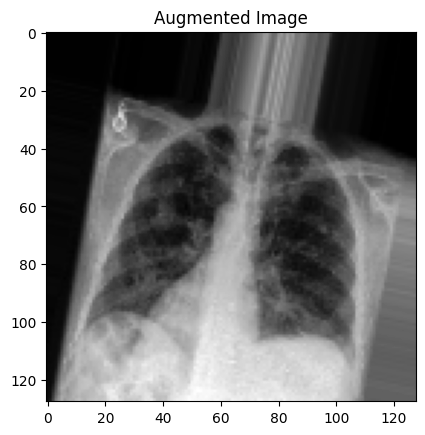

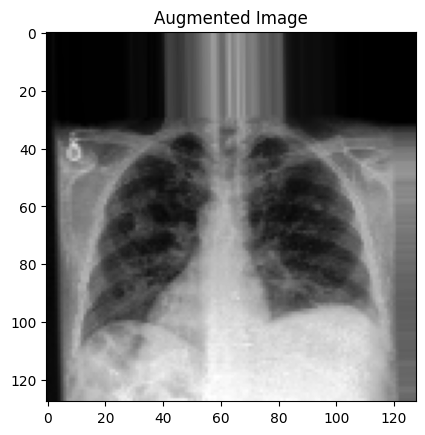

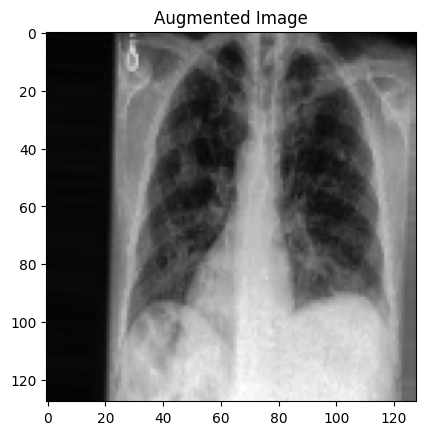

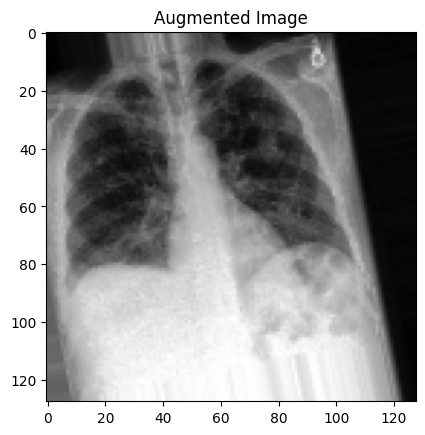

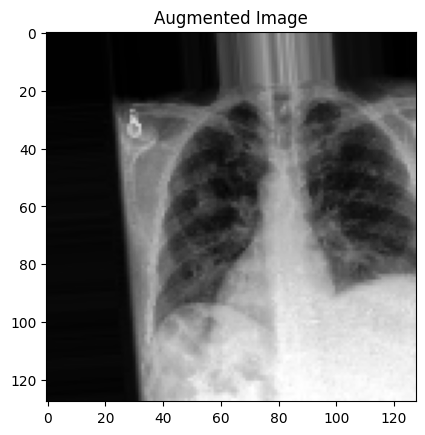

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 이미지를 불러오는 예시
folder_path = './02 Data Preprocessing/datas/Pnuemonia/Positive' # 본인 파일 경로 지정
img_name = os.listdir(folder_path)[0] # 폴더 안의 첫번째 파일명
img_path = os.path.join(folder_path, img_name) # 파일 전체 경로
img = image.load_img(img_path, color_mode='grayscale', target_size=(128, 128)) # 이미지 불러올 때 resize 처리
img = image.img_to_array(img) # array 변환

# 이미지 차원 확장
img = img.reshape((1, ) + img.shape)  # (1, 128, 128, 1)

# 데이터 증강 및 시각화
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.imshow(batch[0].reshape(128, 128), cmap='gray')
    plt.title('Augmented Image')
    plt.show()
    i += 1
    if i >= 5:
        break

### Noise Reduction

In [16]:
def denoise_image(image):
    return cv2.fastNlMeansDenoising(image, None, 30, 7, 21)

# 샘플 이미지 노이즈 제거
denoised_img = denoise_image(img)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.show()


NameError: name 'img' is not defined

### Image Normalization

In [ ]:
def normalize_image(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# 샘플 이미지 정규화
normalized_img = normalize_image(img)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Image')
plt.show()


### Edge Detection

In [ ]:
def detect_edges(image):
    return cv2.Canny(image, 100, 200)

# 샘플 이미지 경계선 검출
edges = detect_edges(img)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detected Image')
plt.show()


### Blurring

In [ ]:
def blur_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# 샘플 이미지 블러링
blurred_img = blur_image(img)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.show()


### Contour Detection

In [ ]:
def find_contours(image):
    ret, thresh = cv2.threshold(image, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# 샘플 이미지 컨투어 검출
contours = find_contours(img)
contour_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
plt.imshow(contour_img, cmap='gray')
plt.title('Contour Detected Image')
plt.show()


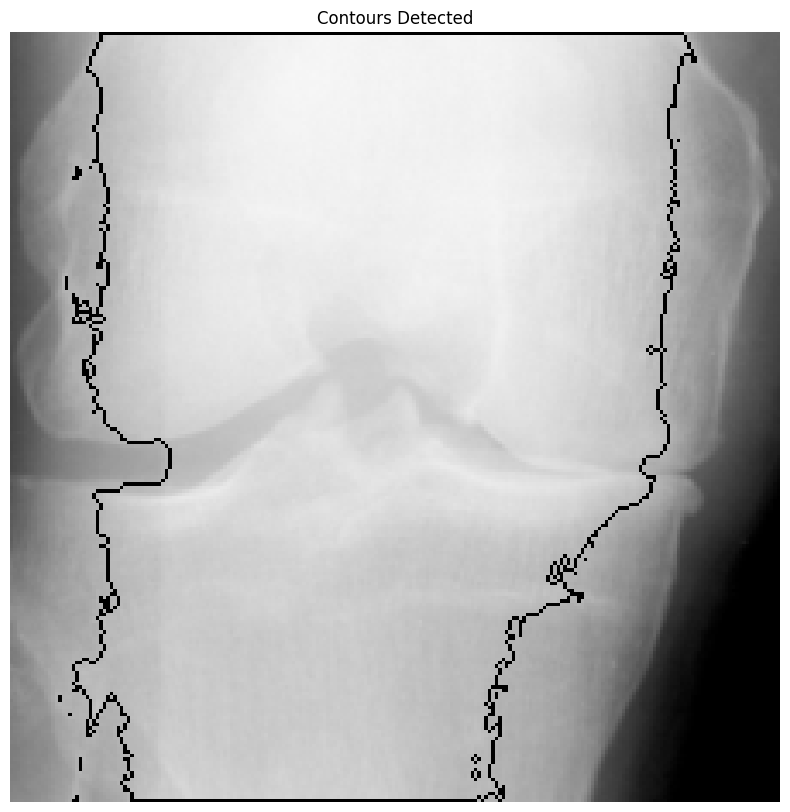

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = './datas/osteoarthritis/auto_test/4/9012867_1.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

ret, thresh = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_color, contours, -1, (0, 0, 0), 1)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title('Contours Detected')
plt.axis('off')
plt.show()

### Data Preparing

In [ ]:
def load_data(data_dir):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'NORMAL' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = resize_image(img)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# 데이터 로드
X_train, y_train = load_data(os.path.join(data_dir, 'train'))
X_test, y_test = load_data(os.path.join(data_dir, 'test'))


## 종합하여 데이터를 준비한다면?

X_train shape: (800, 128, 128)
y_train shape: (800,)
X_test shape: (200, 128, 128)
y_test shape: (200,)


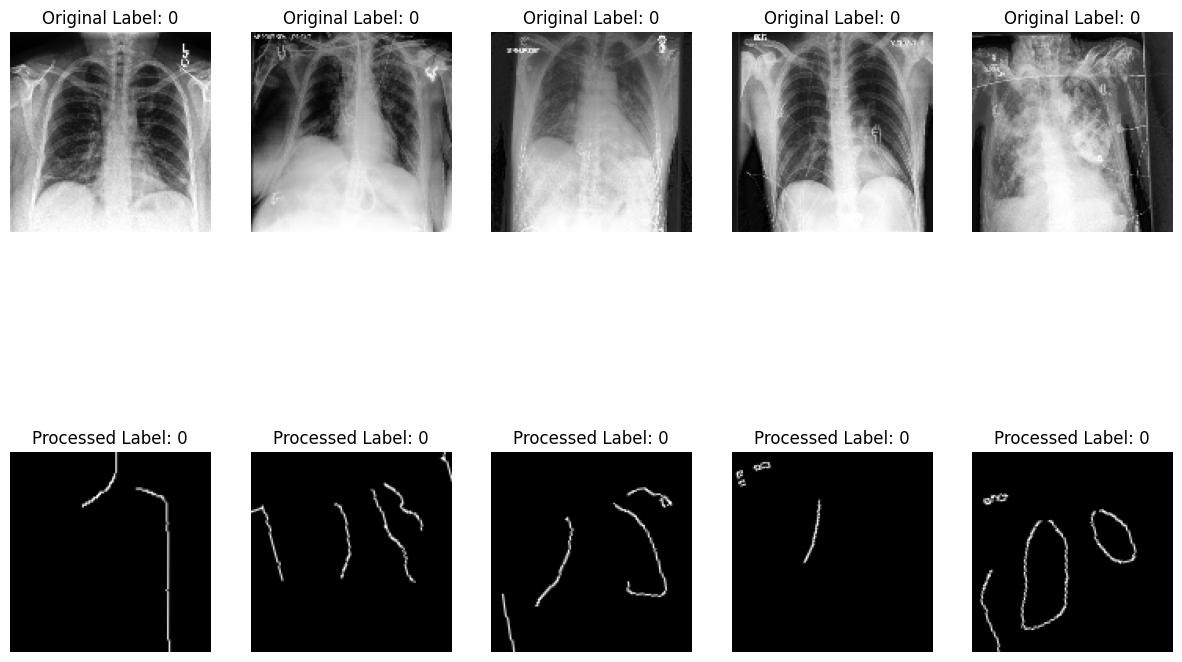

In [12]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# 데이터 경로 설정
data_dir = './datas/Pnuemonia'
categories = ['Negative', 'Positive']
output_size = (128, 128)
output_train_dir = 'processed_data/train'
output_test_dir = 'processed_data/test'
output_original_train_dir = 'original_data/train'
output_original_test_dir = 'original_data/test'

# 필요한 폴더 생성 함수
def create_directories(base_dir, categories):
    os.makedirs(base_dir, exist_ok=True)
    for category in categories:
        os.makedirs(os.path.join(base_dir, category), exist_ok=True)

# 이미지 전처리 함수 정의
def resize_image(image, size=output_size):
    return cv2.resize(image, size)

def equalize_histogram(image):
    return cv2.equalizeHist(image)

def normalize_image(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

def denoise_image(image):
    return cv2.fastNlMeansDenoising(image, None, 30, 7, 21)

def blur_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def detect_edges(image):
    return cv2.Canny(image, 100, 200)

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 데이터 로드 및 분할 함수
def load_and_split_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(resize_image(img))
                labels.append(label)
    return train_test_split(images, labels, test_size=0.2, random_state=42)

# 데이터 전처리 및 저장 함수
def preprocess_and_save_data(images, labels, output_dir, original_output_dir, augment=False):
    create_directories(output_dir, categories)
    create_directories(original_output_dir, categories)
    for idx, (image, label) in enumerate(zip(images, labels)):
        category = 'Negative' if label == 0 else 'Positive'
        save_folder_path = os.path.join(output_dir, category)
        original_save_folder_path = os.path.join(original_output_dir, category)

        original_img_path = os.path.join(original_save_folder_path, f'orig_{idx}.png')
        cv2.imwrite(original_img_path, image)  # 원본 이미지 저장

        img = equalize_histogram(image)
        img = normalize_image(img)
        img = denoise_image(img)
        img = blur_image(img)
        img = detect_edges(img)

        if augment:
            img = img.reshape((1, ) + img.shape + (1, ))  # Keras ImageDataGenerator expects 4D input
            for batch in datagen.flow(img, batch_size=1):
                augmented_img = batch[0].reshape(output_size)
                save_path = os.path.join(save_folder_path, f'aug_{idx}.png')
                cv2.imwrite(save_path, augmented_img)
                break  # 하나의 증강된 이미지만 추가
        else:
            save_path = os.path.join(save_folder_path, f'{idx}.png')
            cv2.imwrite(save_path, img)

# 데이터 로드 및 분할
X_train, X_test, y_train, y_test = load_and_split_data(data_dir, categories)

# 전처리 후 데이터 저장
preprocess_and_save_data(X_train, y_train, output_train_dir, output_original_train_dir, augment=True)
preprocess_and_save_data(X_test, y_test, output_test_dir, output_original_test_dir, augment=False)

# 전처리된 데이터 로드 함수
def load_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(resize_image(img))
                labels.append(label)
    return np.array(images), np.array(labels)

# 원본 데이터 로드 함수
def load_original_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(resize_image(img))
                labels.append(label)
    return np.array(images), np.array(labels)

# 전처리된 데이터 로드
X_train, y_train = load_data(output_train_dir, categories)
X_test, y_test = load_data(output_test_dir, categories)

# 원본 데이터 로드
X_original_train, y_original_train = load_original_data(output_original_train_dir, categories)
X_original_test, y_original_test = load_original_data(output_original_test_dir, categories)

# 데이터 형태 확인
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# 데이터 시각화 (원본과 전처리 후 비교)
def plot_sample_images(original_images, processed_images, labels, n=5):
    plt.figure(figsize=(15, 10))
    for i in range(n):
        plt.subplot(2, n, i+1)
        plt.imshow(original_images[i], cmap='gray')
        plt.title(f'Original Label: {labels[i]}')
        plt.axis('off')

        plt.subplot(2, n, i+n+1)
        plt.imshow(processed_images[i], cmap='gray')
        plt.title(f'Processed Label: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_sample_images(X_original_train, X_train, y_train)


### 테스트 분류 학습

X_train shape: (800, 128, 128)
y_train shape: (800,)
X_test shape: (200, 128, 128)
y_test shape: (200,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                

2024-06-02 18:05:19.901245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 47ms/step - loss: 0.6979 - accuracy: 0.5200 - val_loss: 0.6834 - val_accuracy: 0.5350
Epoch 2/10


2024-06-02 18:05:21.089232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 41ms/step - loss: 0.6895 - accuracy: 0.5450 - val_loss: 0.6808 - val_accuracy: 0.5250
Epoch 3/10
25/25 [==============================] - 1s 40ms/step - loss: 0.6864 - accuracy: 0.5475 - val_loss: 0.6813 - val_accuracy: 0.5900
Epoch 4/10
25/25 [==============================] - 1s 40ms/step - loss: 0.6914 - accuracy: 0.5375 - val_loss: 0.6789 - val_accuracy: 0.5350
Epoch 5/10
25/25 [==============================] - 1s 40ms/step - loss: 0.6871 - accuracy: 0.5562 - val_loss: 0.6836 - val_accuracy: 0.5200
Epoch 6/10
25/25 [==============================] - 1s 40ms/step - loss: 0.6913 - accuracy: 0.5300 - val_loss: 0.6759 - val_accuracy: 0.5900
Epoch 7/10
25/25 [==============================] - 1s 40ms/step - loss: 0.6857 - accuracy: 0.5587 - val_loss: 0.7036 - val_accuracy: 0.5150
Epoch 8/10
25/25 [==============================] - 1s 41ms/step - loss: 0.6824 - accuracy: 0.5625 - val_loss: 0.6902 - val_accuracy: 0.5250
Epoch 9/10
25/25 [======

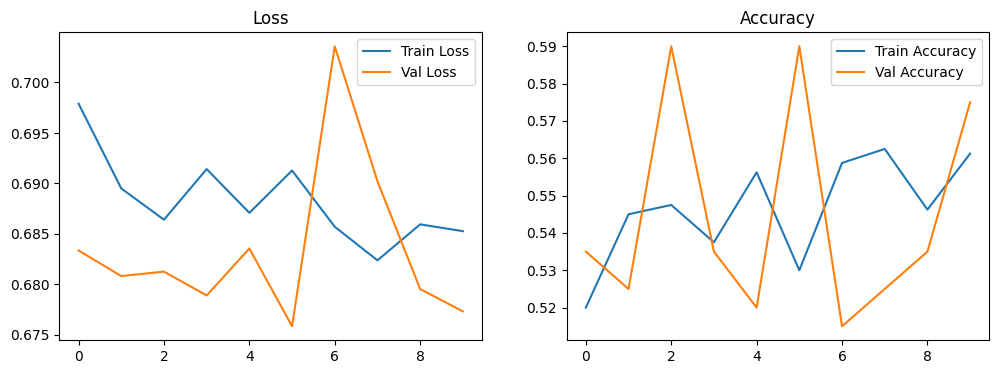

2024-06-02 18:05:30.853072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 12ms/step


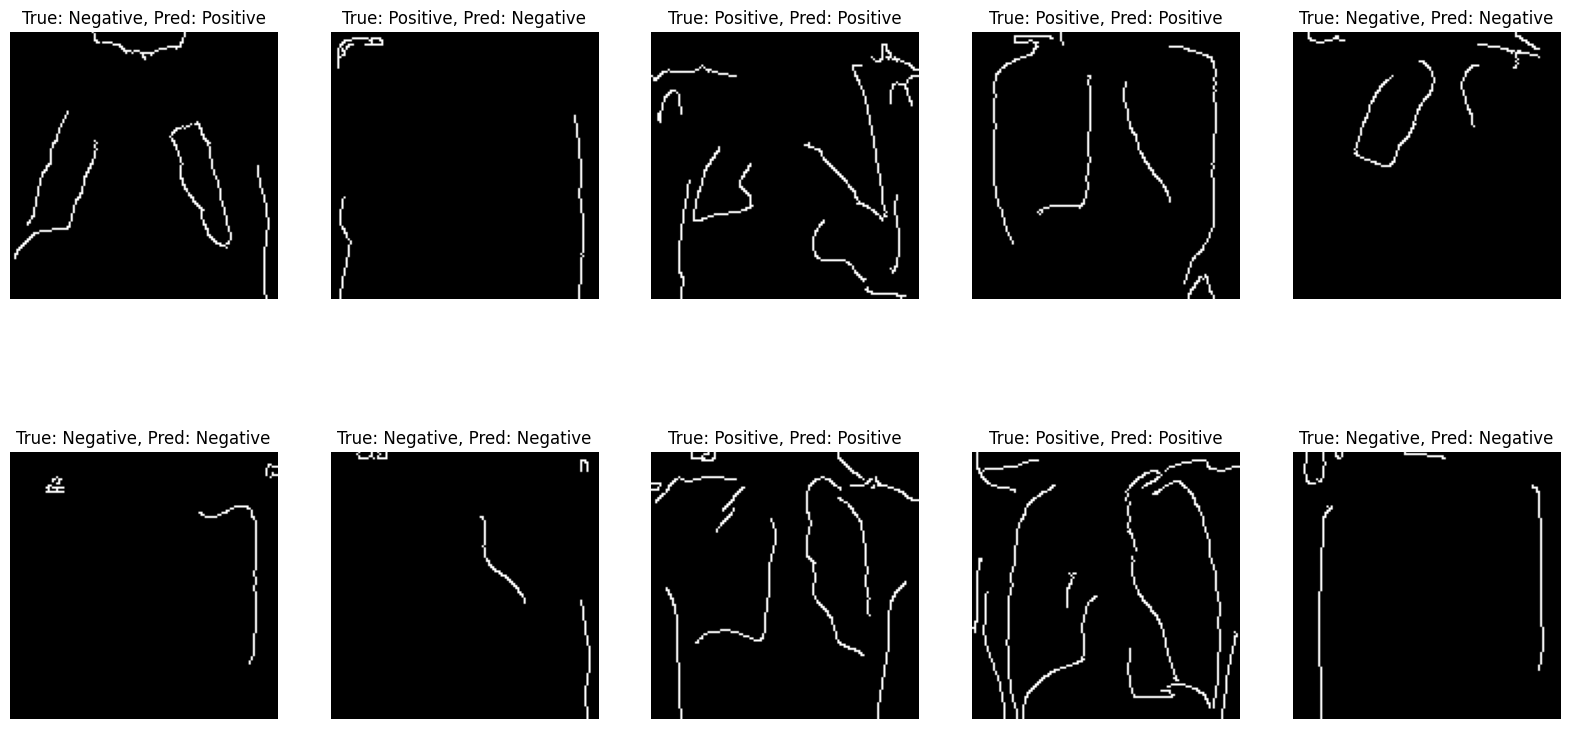

In [6]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

# 데이터 경로 설정
data_dir = './processed_data'
categories = ['Negative', 'Positive']
output_size = (128, 128)

# 전처리된 데이터 로드 함수
def load_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# 전처리된 데이터 로드
X_train, y_train = load_data(os.path.join(data_dir, 'train'), categories)
X_test, y_test = load_data(os.path.join(data_dir, 'test'), categories)

# 데이터 형태 확인
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# 데이터 정규화 및 차원 확장
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], output_size[0], output_size[1], 1)
X_test = X_test.reshape(X_test.shape[0], output_size[0], output_size[1], 1)

# 라벨을 원-핫 인코딩
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(output_size[0], output_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 데이터 증강 적용 및 모델 훈련
train_generator = datagen.flow(X_train, y_train, batch_size=32)
history = model.fit(train_generator, epochs=10, validation_data=(X_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# 학습 곡선 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# 분류 결과 시각화
def plot_predictions(model, X_test, y_test, categories, n=10):
    plt.figure(figsize=(20, 10))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        idx = np.random.randint(0, len(X_test))
        img = X_test[idx].reshape(output_size[0], output_size[1])
        true_label = np.argmax(y_test[idx])
        pred_label = np.argmax(model.predict(X_test[idx].reshape(1, output_size[0], output_size[1], 1)))

        plt.imshow(img, cmap='gray')
        plt.title(f'True: {categories[true_label]}, Pred: {categories[pred_label]}')
        plt.axis('off')
    plt.show()

plot_predictions(model, X_test, y_test, categories)


In [9]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

# 데이터 경로 설정
data_dir = './processed_data'
categories = ['Negative', 'Positive']
output_size = (128, 128)
original_data_dir = './datas/Pnuemonia'

# 전처리된 데이터 로드 함수
def load_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# 전처리된 데이터 로드
X_train, y_train = load_data(os.path.join(data_dir, 'train'), categories)
X_test, y_test = load_data(os.path.join(data_dir, 'test'), categories)

# 원본 데이터 로드 (전처리 없이)
def load_original_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

X_original_train, y_original_train = load_original_data(original_data_dir, categories)
X_original_test, y_original_test = load_original_data(original_data_dir, categories)

# 데이터 형태 확인
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# 데이터 정규화 및 차원 확장
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], output_size[0], output_size[1], 1)
X_test = X_test.reshape(X_test.shape[0], output_size[0], output_size[1], 1)

# 라벨을 원-핫 인코딩
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(output_size[0], output_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 데이터 증강 적용 및 모델 훈련
train_generator = datagen.flow(X_train, y_train, batch_size=32)
history = model.fit(train_generator, epochs=10, validation_data=(X_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# 학습 곡선 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# 분류 결과 시각화 (원본 이미지 포함)
def plot_predictions(model, X_test, y_test, X_original_test, categories, n=10):
    plt.figure(figsize=(20, 10))
    for i in range(n):
        plt.subplot(2, n, i+1)
        idx = np.random.randint(0, len(X_test))
        img = X_test[idx].reshape(output_size[0], output_size[1])
        original_img = X_original_test[idx]
        true_label = np.argmax(y_test[idx])
        pred_label = np.argmax(model.predict(X_test[idx].reshape(1, output_size[0], output_size[1], 1)))

        plt.imshow(original_img, cmap='gray')
        plt.title(f'Original\nTrue: {categories[true_label]}, Pred: {categories[pred_label]}')
        plt.axis('off')
        
        plt.subplot(2, n, i+n+1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Processed\nTrue: {categories[true_label]}, Pred: {categories[pred_label]}')
        plt.axis('off')
    plt.show()

plot_predictions(model, X_test, y_test, X_original_test, categories)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1000,) + inhomogeneous part.

X_train shape: (800, 128, 128)
y_train shape: (800,)
X_test shape: (200, 128, 128)
y_test shape: (200,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                

2024-06-02 18:13:06.704606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 0.7000 - accuracy: 0.5050

2024-06-02 18:13:08.004869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 54ms/step - loss: 0.7000 - accuracy: 0.5050 - val_loss: 0.6908 - val_accuracy: 0.5050
Epoch 2/10
25/25 [==============================] - 1s 41ms/step - loss: 0.6923 - accuracy: 0.5312 - val_loss: 0.6871 - val_accuracy: 0.5450
Epoch 3/10
25/25 [==============================] - 1s 40ms/step - loss: 0.6893 - accuracy: 0.5475 - val_loss: 0.6797 - val_accuracy: 0.5750
Epoch 4/10
25/25 [==============================] - 1s 40ms/step - loss: 0.6847 - accuracy: 0.5400 - val_loss: 0.6829 - val_accuracy: 0.5450
Epoch 5/10
25/25 [==============================] - 1s 40ms/step - loss: 0.6821 - accuracy: 0.5638 - val_loss: 0.6783 - val_accuracy: 0.5450
Epoch 6/10
25/25 [==============================] - 1s 40ms/step - loss: 0.6811 - accuracy: 0.5650 - val_loss: 0.6862 - val_accuracy: 0.5350
Epoch 7/10
25/25 [==============================] - 1s 40ms/step - loss: 0.6844 - accuracy: 0.5688 - val_loss: 0.6910 - val_accuracy: 0.5250
Epoch 8/10
25/25 [======

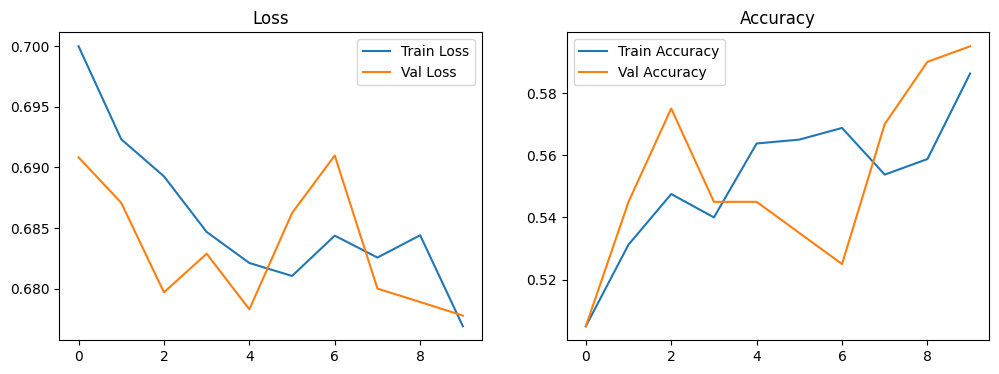

1/1 [==============================] - 0s 12ms/step


2024-06-02 18:13:17.848744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step


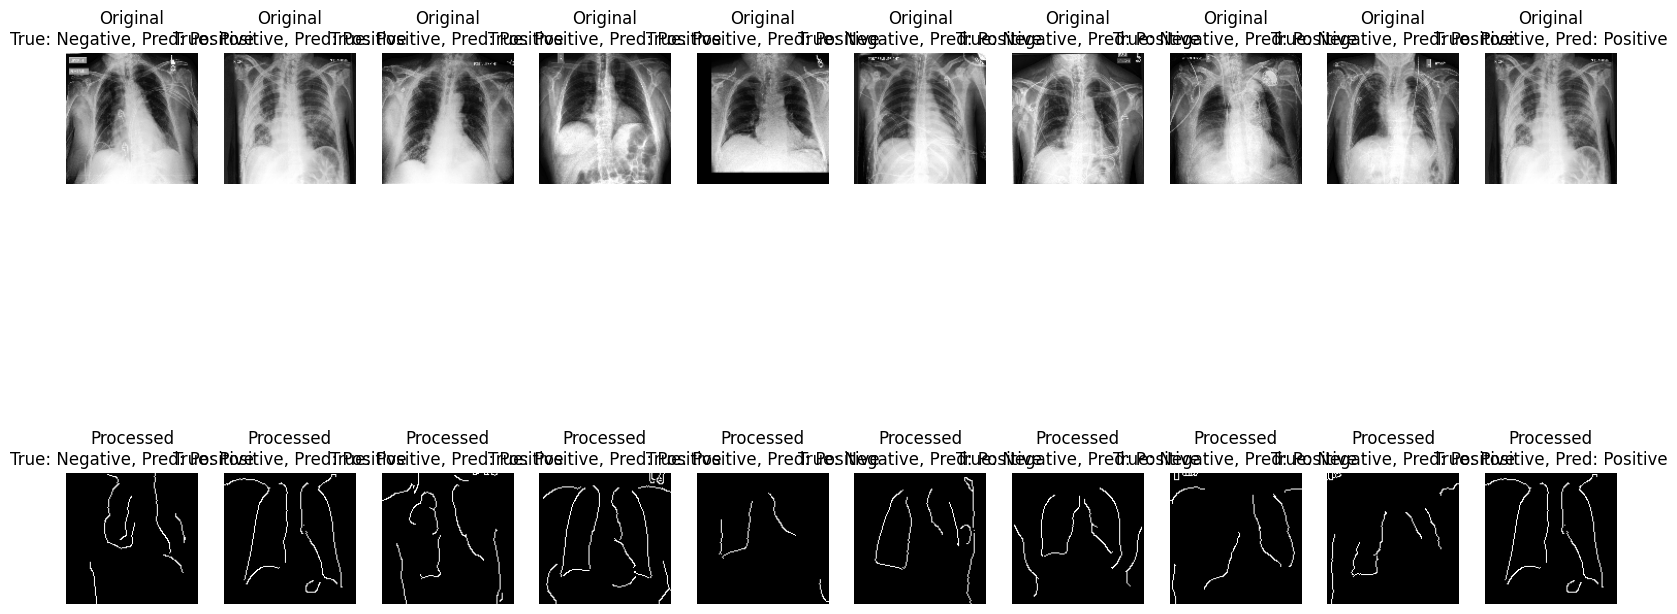

In [10]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

# 데이터 경로 설정
data_dir = './processed_data'
categories = ['Negative', 'Positive']
output_size = (128, 128)
original_data_dir = './datas/Pnuemonia'

# 이미지 전처리 함수 정의
def resize_image(image, size=output_size):
    return cv2.resize(image, size)

# 전처리된 데이터 로드 함수
def load_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = resize_image(img)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# 전처리된 데이터 로드
X_train, y_train = load_data(os.path.join(data_dir, 'train'), categories)
X_test, y_test = load_data(os.path.join(data_dir, 'test'), categories)

# 원본 데이터 로드 (전처리 없이)
def load_original_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = resize_image(img)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

X_original_train, y_original_train = load_original_data(original_data_dir, categories)
X_original_test, y_original_test = load_original_data(original_data_dir, categories)

# 데이터 형태 확인
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# 데이터 정규화 및 차원 확장
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], output_size[0], output_size[1], 1)
X_test = X_test.reshape(X_test.shape[0], output_size[0], output_size[1], 1)

# 라벨을 원-핫 인코딩
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(output_size[0], output_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 데이터 증강 적용 및 모델 훈련
train_generator = datagen.flow(X_train, y_train, batch_size=32)
history = model.fit(train_generator, epochs=10, validation_data=(X_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# 학습 곡선 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# 분류 결과 시각화 (원본 이미지 포함)
def plot_predictions(model, X_test, y_test, X_original_test, categories, n=10):
    plt.figure(figsize=(20, 10))
    for i in range(n):
        plt.subplot(2, n, i+1)
        idx = np.random.randint(0, len(X_test))
        img = X_test[idx].reshape(output_size[0], output_size[1])
        original_img = X_original_test[idx]
        true_label = np.argmax(y_test[idx])
        pred_label = np.argmax(model.predict(X_test[idx].reshape(1, output_size[0], output_size[1], 1)))

        plt.imshow(original_img, cmap='gray')
        plt.title(f'Original\nTrue: {categories[true_label]}, Pred: {categories[pred_label]}')
        plt.axis('off')
        
        plt.subplot(2, n, i+n+1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Processed\nTrue: {categories[true_label]}, Pred: {categories[pred_label]}')
        plt.axis('off')
    plt.show()

plot_predictions(model, X_test, y_test, X_original_test, categories)
